<a href="https://colab.research.google.com/github/bmnat/How-to-Build-a-Machine-Learning-App-in-Python/blob/main/How_to_Build_a_Machine_Learning_App_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Build a Machine Learning App in Python

**Importance of model deployment**

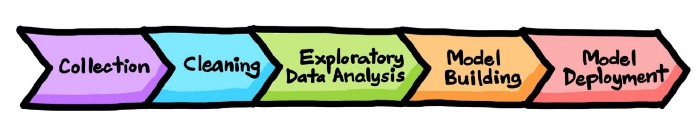

ภาพแสดงภาพรวมของthe data science life cycle

**Overview of the Machine Learning App**

ระดับ high level เว็บแอปที่เราจะสร้างวันนี้จะใช้ไฟล์ CSV เป็นข้อมูลอินพุตเป็นหลัก และแอปจะใช้มันเพื่อสร้าง Regresstion model โดยใช้ Randomforest algorithm



**Front-end** 

ผู้ใช้สามารถอัปโหลดชุดข้อมูลของตนเองเป็นไฟล์ CSV และปรับlearning parameters (in the left panel) และเมื่อปรับพารามิเตอร์เหล่านี้แล้ว ระบบจะสร้างa new machine learning model และแสดงประสิทธิภาพของโมเดล (in the right panel).

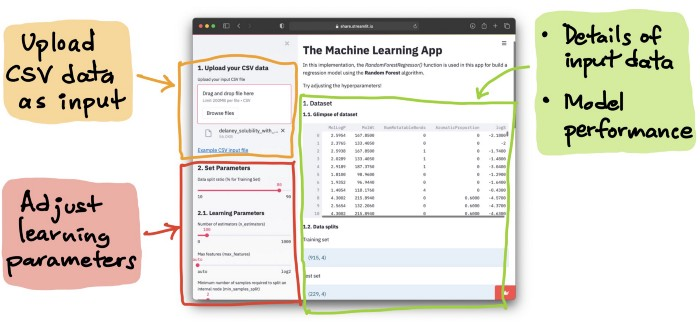

**Upload CSV data as input**

CSVs file มีส่วนหัวคือในบรรทัดแรกเป็นชื่อคอลัมน์ ตามด้วยชุดของข้อมูลตั้งแต่บรรทัดที่ 2 ขึ้นไป เราจะเห็นว่าด้านล่างช่องอัปโหลดในแผงด้านซ้ายมีลิงก์ไปยังไฟล์ CSV ตัวอย่าง (ไฟล์อินพุต CSV ตัวอย่าง) มาดูตัวอย่างไฟล์ CSV ด้านล่างนี้:


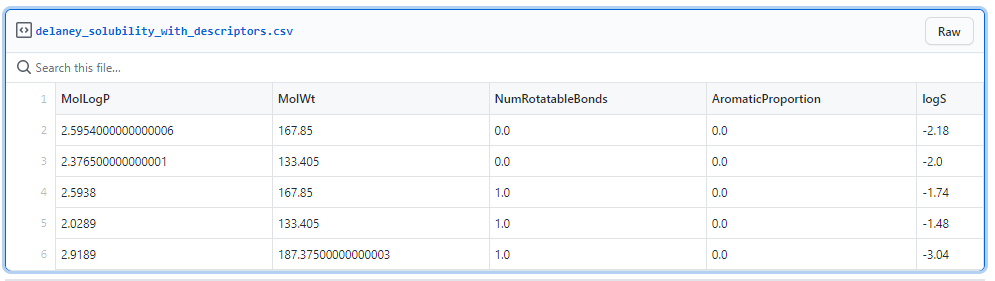



หลังจาก uplode CSVs file จะเห็นว่ามีการสร้าง model machine learning และแสดงผลบน panel ด้านขวา จะสังเกตว่าโมเดลถูกสร้างขึ้นโดยใช้พารามิเตอร์เริ่มต้น ดังนั้นสามารถปรับพารามิเตอร์การเรียนรู้ผ่านslider input และในการปรับแต่ละครั้ง model ใหม่จะถูกสร้างขึ้น

**Model output (right panel)**

สิ่งแรกที่เราจะเห็นคือ input dataframe ใน datasection และผลลัพธ์จะแสดงออกใน model performance section สุดท้าย พารามิเตอร์การเรียนรู้ที่ใช้ในการสร้างแบบจำลองมีอยู่ในส่วนModel Parameters section.

สำหรับ model performance, performance metrics are shown for the training set and test set . As this is a regression model, coefficient of determination(R^2) and error 

**Back-end**
 let’s take a high-level look under the hood of the inner workings of the app.


---

Upon uploading the input CSV file, the contents of the file will be converted into a Pandas dataframe and assigned to the df variable. The dataframe will then be separated into the X and y variables in order to prepare it as input for Scikit-learn. Next, these 2 variables are used for data splitting using the user specified value in the left panel (by default it is using the 80/20 split ratio) 

---
 A random forest model is then built using the major subset (80% subset) and the constructed model is applied to make predictions on the major (80%) and minor (20%) subsets. Model performance for this regression model is then reported into the right panel under the Model Performance section.


**Tech Stacks used in this Tutorial**

3 Python libraries including Streamlit, Pandas and Scikit-learn.

# Line-by-Line Explanation

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes, load_boston

In [ ]:
st.set_page_config(page_title='The Machine Learning App',
    layout='wide')

In [ ]:
# Model building
def build_model(df):
    X = df.iloc[:,:-1] # Using all column except for the last column as X
    Y = df.iloc[:,-1] # Selecting the last column as Y

    # Data splitting
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=(100-split_size)/100)
    
    st.markdown('**1.2. Data splits**')
    st.write('Training set')
    st.info(X_train.shape)
    st.write('Test set')
    st.info(X_test.shape)

    st.markdown('**1.3. Variable details**:')
    st.write('X variable')
    st.info(list(X.columns))
    st.write('Y variable')
    st.info(Y.name)

    rf = RandomForestRegressor(n_estimators=parameter_n_estimators,
        random_state=parameter_random_state,
        max_features=parameter_max_features,
        criterion=parameter_criterion,
        min_samples_split=parameter_min_samples_split,
        min_samples_leaf=parameter_min_samples_leaf,
        bootstrap=parameter_bootstrap,
        oob_score=parameter_oob_score,
        n_jobs=parameter_n_jobs)
    rf.fit(X_train, Y_train)

    st.subheader('2. Model Performance')

    st.markdown('**2.1. Training set**')
    Y_pred_train = rf.predict(X_train)
    st.write('Coefficient of determination ($R^2$):')
    st.info( r2_score(Y_train, Y_pred_train) )

    st.write('Error (MSE or MAE):')
    st.info( mean_squared_error(Y_train, Y_pred_train) )

    st.markdown('**2.2. Test set**')
    Y_pred_test = rf.predict(X_test)
    st.write('Coefficient of determination ($R^2$):')
    st.info( r2_score(Y_test, Y_pred_test) )

    st.write('Error (MSE or MAE):')
    st.info( mean_squared_error(Y_test, Y_pred_test) )

    st.subheader('3. Model Parameters')
    st.write(rf.get_params())



In [ ]:
#---------------------------------#
st.write("""
# The Machine Learning App
In this implementation, the *RandomForestRegressor()* function is used in this app for build a regression model using the **Random Forest** algorithm.
Try adjusting the hyperparameters!
""")


In [ ]:
#---------------------------------#
# Sidebar - Collects user input features into dataframe
with st.sidebar.header('1. Upload your CSV data'):
    uploaded_file = st.sidebar.file_uploader("Upload your input CSV file", type=["csv"])
    st.sidebar.markdown("""
[Example CSV input file](https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv)
""")

In [ ]:
print(uploaded_file)

None


In [ ]:
# Sidebar - Specify parameter settings
with st.sidebar.header('2. Set Parameters'):
    split_size = st.sidebar.slider('Data split ratio (% for Training Set)', 10, 90, 80, 5)

In [ ]:
with st.sidebar.subheader('2.1. Learning Parameters'):
    parameter_n_estimators = st.sidebar.slider('Number of estimators (n_estimators)', 0, 1000, 100, 100)
    parameter_max_features = st.sidebar.select_slider('Max features (max_features)', options=['auto', 'sqrt', 'log2'])
    parameter_min_samples_split = st.sidebar.slider('Minimum number of samples required to split an internal node (min_samples_split)', 1, 10, 2, 1)
    parameter_min_samples_leaf = st.sidebar.slider('Minimum number of samples required to be at a leaf node (min_samples_leaf)', 1, 10, 2, 1)

In [ ]:
with st.sidebar.subheader('2.2. General Parameters'):
    parameter_random_state = st.sidebar.slider('Seed number (random_state)', 0, 1000, 42, 1)
    parameter_criterion = st.sidebar.select_slider('Performance measure (criterion)', options=['mse', 'mae'])
    parameter_bootstrap = st.sidebar.select_slider('Bootstrap samples when building trees (bootstrap)', options=[True, False])
    parameter_oob_score = st.sidebar.select_slider('Whether to use out-of-bag samples to estimate the R^2 on unseen data (oob_score)', options=[False, True])
    parameter_n_jobs = st.sidebar.select_slider('Number of jobs to run in parallel (n_jobs)', options=[1, -1])

In [ ]:
# Main panel

# Displays the dataset
st.subheader('1. Dataset')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.markdown('**1.1. Glimpse of dataset**')
    st.write(df)
    build_model(df)
else:
    st.info('Awaiting for CSV file to be uploaded.')
    if st.button('Press to use Example Dataset'):
        # Diabetes dataset
        #diabetes = load_diabetes()
        #X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
        #Y = pd.Series(diabetes.target, name='response')
        #df = pd.concat( [X,Y], axis=1 )

        #st.markdown('The Diabetes dataset is used as the example.')
        #st.write(df.head(5))

        # Boston housing dataset
        boston = load_boston()
        X = pd.DataFrame(boston.data, columns=boston.feature_names)
        Y = pd.Series(boston.target, name='response')
        df = pd.concat( [X,Y], axis=1 )

        st.markdown('The Boston housing dataset is used as the example.')
        st.write(df.head(5))

        build_model(df)